In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import cv2

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input, SeparableConv2D,Concatenate,Conv2DTranspose, Add, UpSampling2D, Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D,MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, MaxPool2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img


from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical 

from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.regularizers import l2
# from sklearn.utils import class_weight


In [ ]:
os.chdir('drive/MyDrive/xray_lung')
os.getcwd()

'/content/drive/MyDrive/xray_lung'

In [ ]:
#Loading images and masks
image_path = 'Shenzhen/CXR_png'
mask_path = 'Shenzhen/Masks'

images = glob.glob(f'{image_path}/*png')
masks = glob.glob(f'{mask_path}/*png')
masks.sort()

images = [x for x in images if os.path.basename(x)[:-4] in [os.path.basename(y)[:-9] for y in masks]]
images.sort()
print(len(images))
print(len(masks))

566
566


In [ ]:
for i in range(566):
  print(images[i], masks[i])

In [ ]:
img_size = (512,512)
classes = ['background','lung']
num_classes = len(classes)
batch_size = 4

In [ ]:
from image_segmentation.keras_segmentation.models.unet import unet

model = unet(n_classes=num_classes,  input_height=img_size[0], input_width=img_size[1]  )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 514, 514, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 1792        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
index = 10
img = cv2.imread(images[index])/255
mask = cv2.imread(masks[index], 0)/255
print(img.shape)
print(mask.shape)
# print(np.unique(img, return_counts = True))
# print(np.unique(mask, return_counts = True))

(2921, 3000, 3)
(2921, 3000)


In [ ]:
#Load model
model.load_weights(glob.glob('weights/unet_unet/*h5')[-1])


In [ ]:
y_pred = []
y_truth = []
for index in range(len(images)):
  print(os.path.basename(images[index]))
  #Get data and ground truth
  img = cv2.imread(images[index])/255
  mask = cv2.imread(masks[index], 0)/255
  img = cv2.resize(img, img_size, cv2.INTER_AREA)
  mask = cv2.resize(mask, img_size, cv2.INTER_AREA) 
  img = np.expand_dims(img, 0)
  mask = np.ravel(np.expand_dims(mask, (0, -1)))
  y_truth.append(mask)
  #Predict
  mask_pred = np.ravel(np.argmax(model.predict(img), axis = -1))
  y_pred.append(mask_pred)

CHNCXR_0001_0.png
CHNCXR_0002_0.png
CHNCXR_0003_0.png
CHNCXR_0004_0.png
CHNCXR_0005_0.png
CHNCXR_0006_0.png
CHNCXR_0007_0.png
CHNCXR_0008_0.png
CHNCXR_0009_0.png
CHNCXR_0010_0.png
CHNCXR_0011_0.png
CHNCXR_0012_0.png
CHNCXR_0013_0.png
CHNCXR_0014_0.png
CHNCXR_0015_0.png
CHNCXR_0016_0.png
CHNCXR_0017_0.png
CHNCXR_0018_0.png
CHNCXR_0019_0.png
CHNCXR_0020_0.png
CHNCXR_0021_0.png
CHNCXR_0022_0.png
CHNCXR_0023_0.png
CHNCXR_0024_0.png
CHNCXR_0026_0.png
CHNCXR_0027_0.png
CHNCXR_0028_0.png
CHNCXR_0029_0.png
CHNCXR_0030_0.png
CHNCXR_0031_0.png
CHNCXR_0032_0.png
CHNCXR_0033_0.png
CHNCXR_0034_0.png
CHNCXR_0035_0.png
CHNCXR_0041_0.png
CHNCXR_0042_0.png
CHNCXR_0043_0.png
CHNCXR_0044_0.png
CHNCXR_0045_0.png
CHNCXR_0046_0.png
CHNCXR_0047_0.png
CHNCXR_0048_0.png
CHNCXR_0049_0.png
CHNCXR_0050_0.png
CHNCXR_0051_0.png
CHNCXR_0052_0.png
CHNCXR_0053_0.png
CHNCXR_0054_0.png
CHNCXR_0055_0.png
CHNCXR_0056_0.png
CHNCXR_0057_0.png
CHNCXR_0058_0.png
CHNCXR_0059_0.png
CHNCXR_0060_0.png
CHNCXR_0061_0.png
CHNCXR_006

In [ ]:
y_pred = np.array(y_pred)
y_truth = np.array(y_truth)
print(y_pred.shape)
print(y_truth.shape)

(566, 262144)
(566, 262144)


In [ ]:
#Modified due to resize algorithm
y_truth[y_truth>0] = 1
np.unique(y_truth, return_counts = True)

(array([0., 1.]), array([110775071,  37598433]))

In [ ]:
y_truth_ravel = np.ravel(y_truth)
y_pred_ravel = np.ravel(y_pred)

Classification Report
              precision    recall  f1-score   support

  background       0.91      0.97      0.94 110775071
        lung       0.90      0.72      0.80  37598433

    accuracy                           0.91 148373504
   macro avg       0.91      0.85      0.87 148373504
weighted avg       0.91      0.91      0.91 148373504

Confusion Matrix


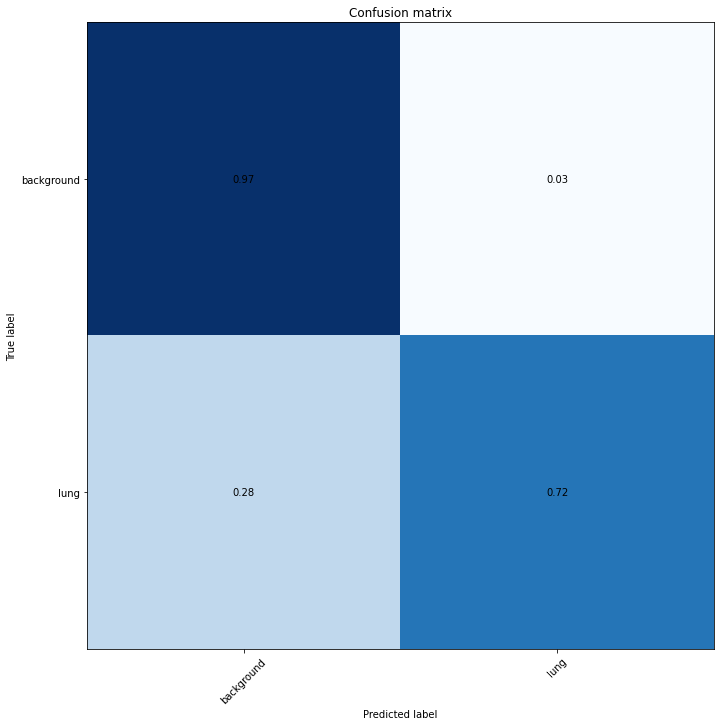

In [ ]:
from evaluate import evaluate
    
evaluate(y_truth_ravel, y_pred_ravel,classes)